# Organize ML experiments

## Introduction

This guide will show you how to:

- Keep track of code, data, environment and parameters
- Log results like evaluation metrics and model files
- Find experiments in the experiment dashboard with tags
- Organize experiments in a dashboard view and save it for later

## Setup

In [ ]:
pip install scikit-learn==0.23.1 joblib==0.15.1 neptune-client==0.4.119

## Step 1: Create a basic training script

In [ ]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from joblib import dump

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size=0.4, random_state=1234)

params = {'n_estimators': 10,
          'max_depth': 3,
          'min_samples_leaf': 1,
          'min_samples_split': 2,
          'max_features': 3,
          }

clf = RandomForestClassifier(**params)

clf.fit(X_train, y_train)
y_train_pred = clf.predict_proba(X_train)
y_test_pred = clf.predict_proba(X_test)

train_f1 = f1_score(y_train, y_train_pred.argmax(axis=1), average='macro')
test_f1 = f1_score(y_test, y_test_pred.argmax(axis=1), average='macro')
print(f'Train f1:{train_f1} | Test f1:{test_f1}')

## Step 2: Initialize Neptune

In [ ]:
import neptune

neptune.init(project_qualified_name='shared/onboarding', # change this to your `workspace_name/project_name`
             api_token='ANONYMOUS', # change this to your api token
            )

## Step 3: Create an experiment and save parameters

In [ ]:
neptune.create_experiment(name='great-idea', params=params)

## Step 4. Add tags to organize things

In [ ]:
neptune.append_tag(['experiment-organization', 'me'])

## Step 5. Add logging of train and evaluation metrics

In [ ]:
neptune.log_metric('train_f1', train_f1)
neptune.log_metric('test_f1', test_f1)

## Step 6. Run a few experiments with different parameters

Let's run some experiments with different model configuration.

1. Change parameters in the ``params`` dictionary of the **Step 1: Create a basic training script**

```python

    params = {'n_estimators': 10,
              'max_depth': 3,
              'min_samples_leaf': 1,
              'min_samples_split': 2,
              'max_features': 3,
              }
``` 

2. Run all the cells, log things to Neptune.

3. Stop Neptune experiment. 

In [ ]:
neptune.stop()

## Step 7. Go to Neptune UI

Click on one of the links created when you run the script or go directly to the app.

If you created your own project in Neptune you can also go to projects tab and find it.

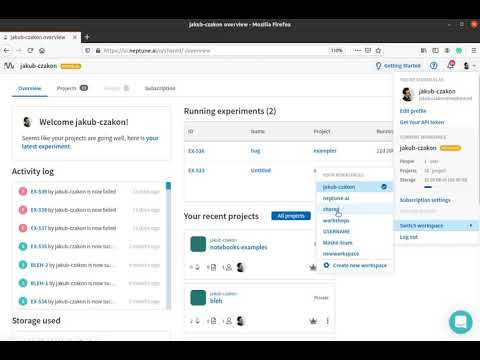

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('rEC-sxhP72w', width=720, height=420)

If you are logging things to the public project ``shared/onboarding`` you can just [follow this link](https://ui.neptune.ai/o/shared/org/onboarding/e/ON-261).

## Step 8. See that everything got logged

Go to one of the experiments you ran and see that you logged things correctly:

- click on the experiment link or one of the rows in the experiment table in the UI
- Go to ``Logs`` section to see your metrics
- Go to ``Source code`` to see that your code was logged
- Go to ``Artifacts`` to see that the model was saved

<iframe width="720" height="420" src="https://www.youtube.com/embed/9iX6DxcijO8" frameborder="0" allow="accelerometer; autoplay; encrypted-media;gyroscope; picture-in-picture" allowfullscreen></iframe>


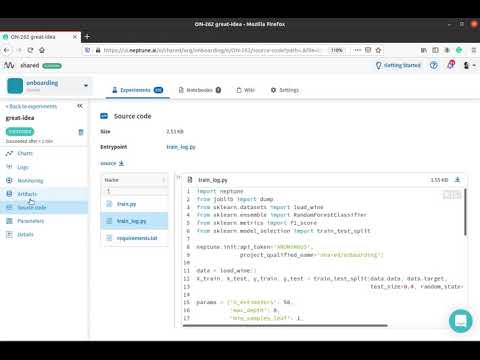

In [5]:
YouTubeVideo('WpAq7Kj88ec', width=720, height=420)

## Step 9. Filter experiments by tag

Go to the experiments space and:

1. Click on the ``go to simple search``
2. In the ``tags`` type ``experiment-organization`` to find it (or other tag you added to your experiment).
3. Select the tag.

Neptune should filter all those experiments for you.

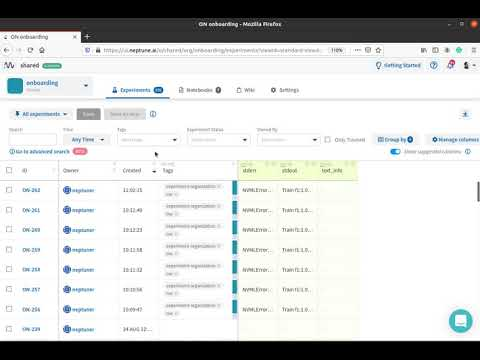

In [6]:
YouTubeVideo('ppPOtU_lNkk', width=720, height=420)

## Step 10. Choose parameter and metric columns you want to see

Use the ``Manage columns`` button to choose the columns for the experiment table:

- Click on ``Manage columns``
- Go to the ``Numeric logs`` and ``Text parameters`` or type a name of your metric or parameter to find it.
- Add ``test_f1`` metric and the parameters you tweaked (in my case ``max_depth``, ``max_features``, ``min_samples_leaf``, and ``n_estimators``).

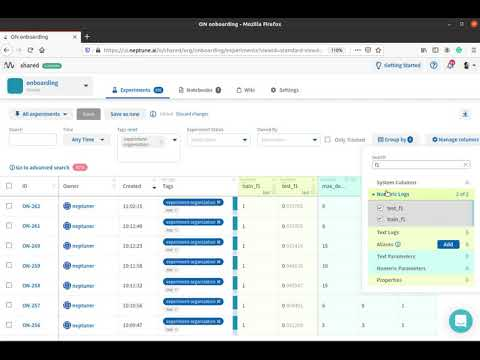

In [7]:
YouTubeVideo('gvlIXa25-Bc', width=720, height=420)

---

**tip:**

    You can also use the suggested columns which shows you the columns with values that differ between selected experiments.

    Just click on the ``+`` to add it to your experiment table.
    
---

## Step 13. Save the view of experiment table

You can save the current view of experiment table for later:

- Click on the ``Save as new``

Both the columns and the filtering on rows will be saved as view.

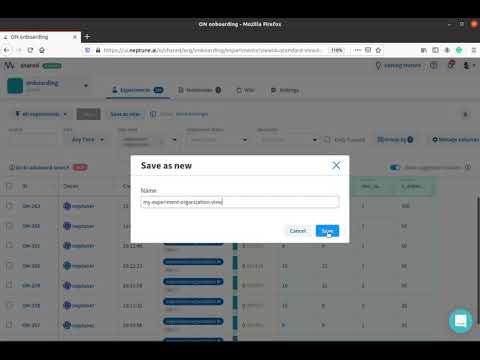

In [8]:
YouTubeVideo('iTgjtYBWqko', width=720, height=420)

---

**tip:**

    Create and save multiple views of the experiment table for different use cases or experiment groups.

---